In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ER 131] Homework 6: Land Use Regression and Model Selection


In this homework, we will continue to build linear regression models. Instead of the single-variable regression models of Homework 5, we will build multi-variable regression models. Specifically, we will work with the Novotny et al. (2011) data to build and analyze the performance of land use regression (LUR) models that predict nitrogen dioxide concentration near the Earth's surface.

### Table of Contents
1. [Project](#section1)<br>
1. [Multiple linear regression using land-use regression data](#section2)<br>
1. [Model selection](#section3)<br>

---


## Section 1: Project <a id='section1'></a>

This week, your group should work collaboratively to refine your research question and identify candidate data sources. You may develop answers to Questions 1.1 and 1.2 as a group, but if you do so, please identify each member's unique contribution (for example: "Jessica summarized reports or datasets #1-2, Duncan summarized reports or datasets #3-4...")

**Question 1.1** Give some context for your prediction problem. Have you come across any work that answers questions that are similar or related to the ones that you are asking? What results have they found? What are you hoping to do differently from other researchers who have asked similar questions?<br>

We're definitely not expecting you to review a lot of academic papers and projects for this question, but you should take a look around to see if there are any papers or reports that ask similar questions or use similar data - beyond giving the reader context for your project in your final report, looking at other people's work can give you ideas for how to approach your own project. 

One way you could approach this question is for each team member to identify and summarize 1-2 relevant citations. Summaries should focus less on the specifics of other papers and more on how findings in the literature inform and motivate your research question. Ultimately, this information can inform the introduction and motivation sections of your final project.

*YOUR ANSWER HERE*

**Question 1.2** Identify, open, and summarize your group's candidate datasets. Try to find $1+N_{s}$ relevant data sources, where $N_{s}$ is the number of students in your group. For **each** dataset:
- Insert a link to and a brief description of the data. 
- Open the dataset and incorporate the dataset into a Pandas dataframe if feasible.
- Grab some descriptive statistics about the dataset using `pd.describe()`. Paste the output below (you can also load it and run `pd.describe()` below, but if it's a very large dataset you might hit the memory limit, in which case you should load and inspect it in a separate notebook and then paste the output below). What do you notice when you run `pd.describe()`? Is there anything surprising or expected about the output?

No need to do a full-scale EDA at this point (we'll do that next week!); this week's focus is on making sure you can open and summarize your candidate datasets.

*YOUR ANSWER HERE*

---


## Section 2: Multiple linear regression using land-use regression data <a id='section2'></a>

In the remainder of this homework, we will dig into the data used by [Novotny et al. (2011)](https://bcourses.berkeley.edu/files/78396490/download?download_frd=1). We'll use these data to explore multiple linear regression, land use regression, and the important questions one has to ask when conducting these types of analyses and interpreting results.

We'll be using two different libraries: `scikit-learn`, and `StatsModels`. `scikit-learn` is preferred in the machine-learning community, and is easier to use for methods concerning prediction (e.g., cross validation). `StatsModels` is preferred in the statistics and econometrics communities, shares syntax closer to R, and generally provides more statistical information.

**Dependencies**

In [2]:
# run this cell
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
pd.set_option('display.max_columns', 150)

**Question 2.1** Let's start by reading in the .csv file "BechleLUR_2006_finalmodel.csv", found in the data folder, as a Pandas dataframe named `df`. Print its first few rows.<br>

These are the data used in the Novotny et al. (2011) paper. The dataframe contains the response and predictor variables, as well as the model results (ie., the predicted variable).

In [3]:
# YOUR CODE HERE
df = pd.read_csv('data/BechleLUR_2006_finalmodel.csv')
df.head()

,Monitor_ID,Latitude,Longitude,State,Location_type,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,800m_Impervious_%,Elevation_truncated_km,800m_MajorRoads_km,100m_MinorRoads_km,Distance_to_coast_km
0,04-013-0019-42602-1,33.48385,-112.14257,Arizona,Suburban,23.884706,20.986643,11.615223,58.9488,0.304,1.35858,0.61637,313.0
1,04-013-3002-42602-6,33.45793,-112.04601,Arizona,Urban And Center City,25.089886,20.990096,11.472677,71.4093,0.304,1.55566,0.26126,323.8
2,04-013-3003-42602-1,33.47968,-111.91721,Arizona,Suburban,19.281969,18.088153,8.990372,53.5480,0.304,1.59508,0.39460,308.4
3,04-013-3010-42602-1,33.46093,-112.11748,Arizona,Suburban,30.645138,20.358009,11.919268,63.1760,0.304,2.42445,0.07244,309.0
4,04-013-4011-42602-1,33.37005,-112.62070,Arizona,Rural,11.070412,8.549622,2.141366,7.7453,0.293,3.18936,0.00000,269.5


**Question 2.2** If your goal is to use multiple linear regression to predict NO2 levels, which column represents the response variable (i.e., the "truth" that you are trying to predict)? Which columns are the independent variables (i.e., features)? State in words what each response and independent variable represents, along with its unit of measurement. The Novotny et al paper is a good reference here.

*YOUR ANSWER HERE*

*The response variable is the 'Observed_NO2_ppb' column, the directly-measured $NO_2$ concentrations at surface level, in parts per billion.*

*The independent variables could conceivably be any of rest of the columns, except for 'Predicted_NO2_PPB' (however, we probably wouldn't want to use 'Monitor_ID' because it is unique to every point and would probably lead to overfit). Full credit for identifying at a minimum columns 'WRF+DOMINO':: as independent variables and providing a unit and short description of each.*

**Question 2.3** Let's filter our dataframe to make it easier to do multiple linear regression. We will not be using all columns in the dataframe `df` as independent or response variables - specifically, we will ignore Monitor_ID, Latitude, Longitude, State and Predicted_NO2_ppb. Create a new dataframe, `df_clean`, that does not include these variables, and print the first few rows.

In [4]:
# YOUR CODE HERE

In [5]:
# solution
df_clean = df.drop(["Latitude", "Longitude", "State", "Predicted_NO2_ppb", 
                                "Monitor_ID"], axis=1)
df_clean.head()

,Location_type,Observed_NO2_ppb,WRF+DOMINO,800m_Impervious_%,Elevation_truncated_km,800m_MajorRoads_km,100m_MinorRoads_km,Distance_to_coast_km
0,Suburban,23.884706,11.615223,58.9488,0.304,1.35858,0.61637,313.0
1,Urban And Center City,25.089886,11.472677,71.4093,0.304,1.55566,0.26126,323.8
2,Suburban,19.281969,8.990372,53.5480,0.304,1.59508,0.39460,308.4
3,Suburban,30.645138,11.919268,63.1760,0.304,2.42445,0.07244,309.0
4,Rural,11.070412,2.141366,7.7453,0.293,3.18936,0.00000,269.5


**Question 2.4** There is one qualitative variable in our dataframe. Which one is it? What are its possible values?

In [6]:
# SCRATCH WORK HERE
df_clean['Location_type'].unique()

array(['Suburban', 'Urban And Center City', 'Rural', 'Unknown'],
      dtype=object)

*YOUR ANSWER HERE*

*Only 'Location_type' is qualitative. Its values are "Suburban," "Urban and Center City," "Rural," and "Unknown."*

Let's transform the qualitative categories of the variable you identified in Question 2.4 into a set of binary variables using the Pandas one-hot encoder. 

**Question 2.5** What is the minimum number of binary variables you will need to create in order to represent that categorical data in the qualitative variable you identified in Question 2.4?

*YOUR ANSWER HERE*

*Three; i.e., n-1, where n is the number of categories.*

**Question 2.6** Replace the ellipsis in the cell below to create a dataframe in which the columns are the binary variables (corresponding to the categories of our qualitative variable), the rows correspond to observations, and the elements are either 0 or 1.

In [7]:
binary_vars = pd.get_dummies(df_clean['Location_type']) # pd.get_dummies(...) # YOUR CODE HERE
binary_vars.head()

,Rural,Suburban,Unknown,Urban And Center City
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [8]:
assert binary_vars.shape == (369,4)

**Question 2.7** Replace the qualitative variable in your `df_clean` dataframe with the set of binary variables you produced in Question 2.6. In other words, `drop` the column containing the quantitative variable and `concat` the columns you produced in 2.6. Do not change the name of `df_clean`.

In [9]:
# YOUR CODE HERE

In [10]:
df_clean.drop(labels = 'Location_type', axis = 1, inplace = True)
df_clean = pd.concat([df_clean, binary_vars], axis=1)
df_clean.head()

,Observed_NO2_ppb,WRF+DOMINO,800m_Impervious_%,Elevation_truncated_km,800m_MajorRoads_km,100m_MinorRoads_km,Distance_to_coast_km,Rural,Suburban,Unknown,Urban And Center City
0,23.884706,11.615223,58.9488,0.304,1.35858,0.61637,313.0,0,1,0,0
1,25.089886,11.472677,71.4093,0.304,1.55566,0.26126,323.8,0,0,0,1
2,19.281969,8.990372,53.5480,0.304,1.59508,0.39460,308.4,0,1,0,0
3,30.645138,11.919268,63.1760,0.304,2.42445,0.07244,309.0,0,1,0,0
4,11.070412,2.141366,7.7453,0.293,3.18936,0.00000,269.5,1,0,0,0


**Question 2.8** Now, let's use `scikit-learn` to fit our linear model. In the cell below, fit a linear model using the response and independent variables in `df_clean`. The process will be very similar to the process for fitting a linear model (call it `sk_model`) using a single response variable (see Lab and Homework 5). Save the output of `.fit()` to `sk_fit`.

In [11]:
# YOUR CODE HERE
X = df_clean.drop(['Observed_NO2_ppb'], axis =1)
y = df_clean[['Observed_NO2_ppb']]
sk_model = linear_model.LinearRegression()
sk_fit = sk_model.fit(X,y)

Print your model's intercepts and coefficients.

In [12]:
# YOUR CODE HERE
# Intercept
print("Intercept:", sk_fit.intercept_)
# Coefficients
print("Coefficients:", sk_fit.coef_)

Intercept: [3.30496772]
Coefficients: [[ 7.25192736e-01  7.80045987e-02  1.09444193e+01  3.06106189e-01
   2.26642047e+00 -1.07630392e-03 -1.20805162e+00 -2.25365635e-01
   1.07822156e+00  3.55195695e-01]]


Notice how scikit-learn is very simple to use, but is not always informative - in this case, we aren't told which column each these coefficients corresponds to. In order to get that information, we are going to run linear regression using the `statsmodels` library. 

**Question 2.9** In the cell below, fit $X$ and $y$ to a linear model using `statsmodels`. The skeleton code below will get you started, but you should also check out the [documentation for linear modeling in statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).<br> 

Don't forget to add a column of 1's to $X$ so that `statsmodels` can fit an intercept.

In [13]:
# YOUR CODE HERE
X2 = sm.add_constant(X)
sm_model = sm.OLS(y, X2)
results = sm_model.fit()
results.summary()

C:\Users\jessi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Observed_NO2_ppb   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     144.0
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          2.23e-113
Time:                        15:13:55   Log-Likelihood:                -935.08
No. Observations:                 369   AIC:                             1890.
Df Residuals:                     359   BIC:                             1929.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6440      0.478      5.531      0.000       1.704       3.584
WRF+DOMINO                 0.7252      0.037     19.547      0.000       0.652       0.798
800m_Impervious_%          0.0780      0.012      6.781      0.000       0.055       0.101
Elevation_truncated_km    10.9444      1.726      6.339      0.000       7.549      14.340
800m_MajorRoads_km         0.3061      0.085      3.594      0.000       0.139       0.474
100m_MinorRoads_km         2.2664      1.060      2.139      0.033       0.182       4.350
Distance_to_coast_km      -0.0011      0.000     -2.727      0.007      -0.002      -0.000
Rural                     -0.5471      0.474     -1.155      0.249      -1.479       0.384
Suburban                   0.4356      0.453      0.961      0.337      -0.456       1.327
Unknown                    1.7392      1.445      1.204      0.229      -1.102       4.581
Urban And Center City      1.0162      0.535      1.900      0.058      -0.036       2.068
==============================================================================
Omnibus:                       30.882   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.079
Skew:                           0.605   Prob(JB):                     4.42e-10
Kurtosis:                       4.157   Cond. No.                     2.88e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Question 2.10** A good check of whether or not you've set up your `statsmodels` regression properly is if the coefficient and intercept values match up with those output by `scikit-learn`. Compare your outputs from 2.8 and 2.9. Were your intercepts and all of the coefficients the same across the two methods? If not, why do you think this might be the case? How might you change your inputs for fitting either `scikit-learn` or the `statsmodels` to make the outputs match?

*Hint:* If you're stuck, go back and listen closely to video W6.2.2 of the asynchronous modules.

In [14]:
# SCRATCH WORK HERE

*YOUR ANSWER HERE*

*The intercepts and the four coefficients for the binary variables don't match between the two methods. This is because we have a redundant variable if we include all four binary variables, when we only need three. You could correct this issue and get the same output for both methods by dropping one of the four binary variables from your X dataframe. We show this option in the code blocks below, dropping the 'Unknown' column from the X dataframe.*

*An alternative option is to drop the intercept but keep all four binary variables; however this is easier to implement in `statsmodels` (i.e., by not applying `add_constant` to your X dataframe) than it is for `scikit-learn`.*

In [15]:
# Solution: drop the 'Unknown' column and re-fit both the scikit-learn and statsmodel regressions
X_soln = df_clean.drop(['Observed_NO2_ppb','Unknown'], axis =1)
y = df_clean[['Observed_NO2_ppb']]
sk_model_soln = linear_model.LinearRegression()
sk_fit_soln = sk_model_soln.fit(X_soln,y)
print("Intercept:", sk_fit_soln.intercept_)
# Coefficients
print("Coefficients:", sk_fit_soln.coef_)

Intercept: [4.38318928]
Coefficients: [[ 7.25192736e-01  7.80045987e-02  1.09444193e+01  3.06106189e-01
   2.26642047e+00 -1.07630392e-03 -2.28627319e+00 -1.30358720e+00
  -7.23025868e-01]]


In [16]:
X2_soln = sm.add_constant(X_soln)
sm_model_soln = sm.OLS(y, X2_soln)
results_soln = sm_model_soln.fit()
results_soln.summary()

C:\Users\jessi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Observed_NO2_ppb   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     144.0
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          2.23e-113
Time:                        15:13:55   Log-Likelihood:                -935.08
No. Observations:                 369   AIC:                             1890.
Df Residuals:                     359   BIC:                             1929.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.3832      1.815      2.415      0.016       0.814       7.952
WRF+DOMINO                 0.7252      0.037     19.547      0.000       0.652       0.798
800m_Impervious_%          0.0780      0.012      6.781      0.000       0.055       0.101
Elevation_truncated_km    10.9444      1.726      6.339      0.000       7.549      14.340
800m_MajorRoads_km         0.3061      0.085      3.594      0.000       0.139       0.474
100m_MinorRoads_km         2.2664      1.060      2.139      0.033       0.182       4.350
Distance_to_coast_km      -0.0011      0.000     -2.727      0.007      -0.002      -0.000
Rural                     -2.2863      1.818     -1.257      0.209      -5.862       1.290
Suburban                  -1.3036      1.833     -0.711      0.477      -4.909       2.302
Urban And Center City     -0.7230      1.874     -0.386      0.700      -4.408       2.962
==============================================================================
Omnibus:                       30.882   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.079
Skew:                           0.605   Prob(JB):                     4.42e-10
Kurtosis:                       4.157   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 2.11** Examine the bounds of the 95% confidence interval provided in the output from Question 2.9 (i.e., the "[0.025" and "0.975]" columns). For which of the independent variables would you be most skeptical that a relationship exists between that variable and the response variables? Why?

*YOUR ANSWER HERE*

*All four binary variables ("Rural," "Suburban," "Unknown" and "Urban and City Center"). We are skeptical of the significance of these variables because the 95% confidence interval for their coefficients contains zero, meaning that there's a >5% probability that there is no relationship between the these variables and the response variable.*

---


## Section 3: Model selection <a id='section3'></a>

Now that we've produced a multiple regression model, we can think about model selection. Model selection is the process of choosing a subset of independent variables to include in a regression model. To do this, we need a search strategy: how are we going to systematically include or exclude different variables in our model? 

One way to assess a model is using the Aikake Information Criterion ($\text{AIC}$). The $\text{AIC}$ assesses the ***quality*** of a model. Depending on the data that we use in our model - in this case, the data associated with the independent variables we add - AIC tells us how our model performs. Sometimes adding more data (i.e., independent variables) improves quality, and sometimes it doesn't. 

We define $\text{AIC}$ as the following:

$\text{AIC} = 2 \times (\text{number of features}) - 2 \times \ln(\text{maximum value of likelihood function})$

A likelihood function tells us what the maximum likelihood is that the coefficients that we have chosen will predict the true $y$ value. We don't go into it in much depth, but we will provide the code to calculate it.

The smaller $\text{AIC}$ is, the better the model performance. One way to think about it: if $\text{AIC}$ is small, the likelihood function is high - i.e., there's a high likelihood that the coefficients predict the observed $y$ value. And if we have one model that uses less features, and another that uses more features, but they have the same likelihood function, then the model that uses less features has a smaller AIC value. AIC thus defines models that have a relatively high probability of predicting the observed values, while using relatively few features, as high quality models.

$\text{AIC}$ is important because we can use it as a benchmark for model selection. **Our goal is to find a model that has the highest *quality*--i.e., the lowest AIC.** 

**Question 3.1** Load the file "allmodelbuildingdata.csv" into a Pandas dataframe. This dataframe that contains all the features that were in `df` as well as additional features.

In [17]:
# YOUR CODE HERE
df_all = pd.read_csv("data/BechleLUR_2006_allmodelbuildingdata.csv")
df_all.head()

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,Impervious_200,Impervious_300,Impervious_400,Impervious_500,Impervious_600,Impervious_700,Impervious_800,Impervious_1000,Impervious_1200,Impervious_1500,Impervious_1800,Impervious_2000,Impervious_2500,Impervious_3000,Impervious_3500,Impervious_4000,Impervious_5000,Impervious_6000,Impervious_7000,Impervious_8000,Impervious_10000,Population_100,Population_200,Population_300,Population_400,Population_500,Population_600,Population_700,Population_800,Population_1000,Population_1200,Population_1500,Population_1800,Population_2000,Population_2500,Population_3000,Population_3500,Population_4000,Population_5000,Population_6000,Population_7000,Population_8000,Population_10000,Major_100,Major_200,Major_300,Major_400,Major_500,Major_600,Major_700,Major_800,Major_1000,Major_1200,Major_1500,Major_1800,Major_2000,Major_2500,Major_3000,Major_3500,Major_4000,Major_5000,Major_6000,Major_7000,Major_8000,Major_10000,Resident_100,Resident_200,Resident_300,Resident_400,Resident_500,Resident_600,Resident_700,Resident_800,Resident_1000,Resident_1200,Resident_1500,Resident_1800,Resident_2000,Resident_2500,Resident_3000,Resident_3500,Resident_4000,Resident_5000,Resident_6000,Resident_7000,Resident_8000,Resident_10000,Resident_10500,Resident_11000,Resident_11500,Resident_12000,Resident_12500,Resident_13000,Resident_13500,Resident_14000,total_100,total_200,total_300,total_400,total_500,total_600,total_700,total_800,total_1000,total_1200,total_1500,total_1800,total_2000,total_2500,total_3000,total_3500,total_4000,total_5000,total_6000,total_7000,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
0,04-013-0019-42602-1,AZ,33.48385,-112.14257,23.884706,20.986643,11.615223,313.0,0.304,59.4431,59.4715,59.4810,59.4572,59.3039,59.1636,59.0507,58.9488,58.7941,58.9821,59.2879,59.8456,60.1169,60.1553,59.7722,59.5908,59.5556,59.2200,58.3484,57.5475,56.3765,52.2642,3434.0000,3434.0000,3411.8328,3369.4805,3374.2180,3403.9201,3425.0499,3440.4236,3467.5636,3496.6767,3507.2187,3388.9482,3306.8511,3096.9563,2870.9081,2712.0688,2652.9409,2541.2515,2428.1611,2337.5601,2245.5723,2024.5460,0.00000,0.00000,0.00000,0.00000,0.49224,0.84872,1.11154,1.35858,3.48036,6.72288,10.45728,17.17240,21.46712,31.77685,50.76791,79.74268,104.89995,166.58362,231.04656,298.41773,384.37428,554.79507,0.61637,1.76406,3.64989,6.05967,9.08376,12.49667,16.72079,20.95306,28.19335,36.77423,56.07123,76.17936,92.75979,141.40171,208.14918,277.49442,360.92204,560.02672,803.90089,1089.93658,1404.00587,2083.12410,2269.08304,2454.55438,2635.14164,2843.33267,3069.31560,3254.15743,3433.87888,3623.34585,0.61637,1.76406,3.64989,6.05967,9.57600,13.34539,17.83233,22.31164,31.67371,43.49711,66.52851,93.35176,114.22691,173.17856,258.91709,357.23710,465.82199,726.61034,1034.94745,1388.35431,1788.38015,2637.91917,2862.73591,3096.99468,3339.22952,3609.20650,3896.25748,4150.54739,4396.96011,4651.18890
1,04-013-3002-42602-6,AZ,33.45793,-112.04601,25.089886,20.990096,11.472677,323.8,0.304,72.0000,72.0000,72.0000,72.0000,71.9109,71.6594,71.4787,71.4093,71.4899,71.6481,71.9319,71.8449,71.2728,69.4570,68.0373,66.6440,65.7764,63.4799,60.5909,59.0333,58.2535,55.1395,2715.9121,2820.9973,2857.7844,2882.9007,2922.6060,2955.1033,2980.2975,2975.5773,2858.6769,2713.3988,2540.6768,2411.3403,2336.4432,2171.0319,2067.0406,1998.7573,1939.4790,1826.4574,1728.7592,1683.7545,1683.8406,1652.0872,0.00000,0.16726,0.47770,0.70926,0.92816,3.44480,5.58398,7.46132,13.62402,26.06820,40.44928,51.82634,60.07474,79.14227,100.46330,130.76356,159.86952,232.42547,291.65556,383.84647,499.06352,705.01818,0.26126,1.14480,1.98903,4.33272,6.93099,9.68176,13.13134,17.11873,25.53028,36.59210,56.75135,83.25340,99.69127,149.45363,207.70180,272.08012,351.49761,549.40811,725.27587,947.93127,1231.98435,1857.31130,2029.32556,2196.75975,2384.41496,2579.46411,277

**Question 3.2** Fill in the code below to compute the AIC using the log likelihood function. `statsmodels` returns log likelihood from the fitted model using the right syntax. In the function definition below, `fit_model` represents the output of a call of `statsmodels` `.fit()` method (eg. the `results` variable that we defined above to get the multiple regression). `k` represents the number of features in the model.

*Note*: Yes, `statsmodels` also returns AIC directly, but we'd like you to do at least *a little* work to compute AIC here! Check the [attributes section of the linear regression documentation](https://www.statsmodels.org/stable/regression.html) to figure out how to grab the likelihood value.

In [18]:
# def computeAIC(fit_model,k):
#     llf = ... # get likelihood
#     AIC = ... # calculate AIC
#     return AIC

In [19]:
# solution
def computeAIC(fit_model, k):
    llf = fit_model.llf
    AIC = 2 * k  - 2 * llf 
    return AIC

**Question 3.3** Use `computeAIC` to compute the AIC of the `results` model from Question 2.9 of the homework. Check that your result matches the AIC given in the `statsmodels` summary.

In [20]:
#YOUR CODE HERE

In [21]:
k = len(X2.columns) -1 
computeAIC(results, k)

1890.156193368086

As stated earlier, the lower the AIC the better. Let's choose our own features and see if we can create a model that has a comparable AIC; we can start off choosing a few features and see what we get.


**Question 3.4** Choose the features `WRF+DOMINO`, `Distance_to_coast_km`, `Elevation_truncated_km`, `Impervious_100`, and two more features of your choice. Then, fit this model and calculate the AIC.

In [22]:
# YOUR CODE HERE

In [23]:
#SOLUTION
X_34 = df_all[['WRF+DOMINO', 'Distance_to_coast_km', 'Elevation_truncated_km', 'Impervious_100', 'total_13500', 'Resident_3500']]

X_34const = sm.add_constant(X_34)

sm_model_34 = sm.OLS(y, X_34const)
results_34 = sm_model_34.fit()

computeAIC(results_34, X_34const.shape[1])

1917.2650840137462

Let's try computing a model with fewer features.

**Question 3.5** From the previous model, keep only `WRF+DOMINO`, `Distance_to_coast_km`, and `Impervious_100` and calculate the AIC. Did the quality of your model improve?

In [24]:
# YOUR CODE HERE

*YOUR ANSWER HERE*

In [25]:
# Example solution
X_35 = df_all[['WRF+DOMINO', 'Distance_to_coast_km', 'Impervious_100']]

X_35const = sm.add_constant(X_35)

sm_model_35 = sm.OLS(y, X_35const)
results_35 = sm_model_35.fit()

computeAIC(results_35, X_35const.shape[1])

1944.5946953800199

*The model quality got worse in this example. The cost of losing certain features was greater than the benefit of reducing the total number of features.*

**Question 3.6** Make a plot that shows model quality and the likelihood function as a function of the number of independent variables. Your plot will have two subplots: the y-axis of the first will be AIC, and the second will be the log likelhood function. The x-axis of both subplots is $k$, ranging from k = 1 to the total number of features in `df_all`. You can approach this however you want, but you do have to explain your approach - specifically, how did you choose which features to add for each $k$ value? Do you notice any trends in the AIC and likelihood values? Can you explain that trend, based on what you know about how AIC is calculated?<br>

*Note*: we're not asking you to calculate AIC for every combination of independent variables, just for different numbers of independent variables (features).

*YOUR APPROACH HERE*

In [30]:
# YOUR CODE HERE

In [32]:
# # YOUR PLOT HERE
# fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize = (12,8))

# ax0.plot(...,..., color = 'navy')
# ax0.set_xlabel(...)
# ax0.set_ylabel(...)
# ax0.set_title(...)

# ax1.plot(...,..., color = 'gold')
# ax1.set_xlabel(...)
# ax1.set_ylabel(...)
# ax1.set_title(...)

# plt.show()

In [27]:
# possible solution

nfeatures = np.arange(1,len(df_all.columns[5:])) # k values; ignore the first six columns
features = df_all.drop(columns = ["Monitor_ID", "State", "Latitude", "Longitude", "Observed_NO2_ppb", "Predicted_NO2_ppb"]) # remove non-response variables
model_aic = [] # initialize empty list to store model AIC values
llf = [] # initialize empty list to store likelihood function values


for k in nfeatures:
    # choose first k features
    X = features.iloc[:, 0:k]
    Xconst = sm.add_constant(X)
    
    sm_model = sm.OLS(y, Xconst)
    results = sm_model.fit()
    
    model_aic.append(computeAIC(results, k))
    llf.append(results.llf)

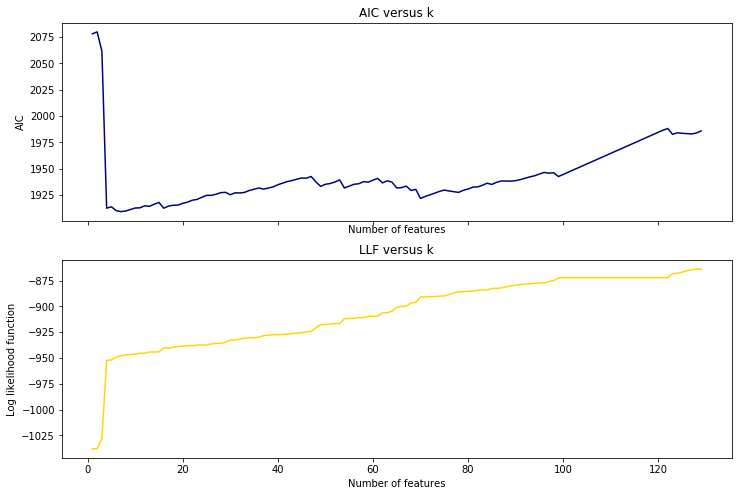

In [28]:
# graph

fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize = (12,8))

ax0.plot(nfeatures, model_aic, color = 'navy')
ax0.set_xlabel('Number of features')
ax0.set_ylabel('AIC')
ax0.set_title('AIC versus k')

ax1.plot(nfeatures, llf, color = 'gold')
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Log likelihood function')
ax1.set_title('LLF versus k')

plt.show()

**Question 3.7** Approximately how many features does the highest quality model have, based on AIC? How many features maximize the likelihood that the model predicts the true response variable?

*YOUR ANSWER HERE*

In [29]:
np.where(np.array(model_aic)==np.array(model_aic).min())

(array([6], dtype=int64),)

*In the solution example, the highest quality model (i.e., the one with the lowest AIC) has six features. The model that maximizes LLF includes all features.*

----
## Submission

Congrats, you've finished Homework 6! 

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file through bCourses.


---
Notebook developed by: Joshua Asuncion, revised by Jessica Katz

Data Science Modules: http://data.berkeley.edu/education/modules
